## Regression 

* Simple Linear Regression Example
* Penalized Linear Regression with Cross Validation 

In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
# Advertising Example

# Read data by pandas 
path = '8.Advertising.csv'

data = pd.read_csv(path)    # TV、Radio、Newspaper、Sales
x = data[['TV', 'Radio', 'Newspaper']]
# x = data[['TV', 'Radio']]
y = data['Sales']
print(x.head())
print(y.head())

      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4
0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64


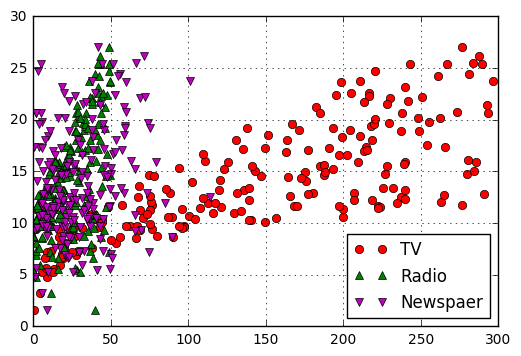

In [7]:
# Plot the x variables 
plt.plot(data['TV'], y, 'ro', label='TV')
plt.plot(data['Radio'], y, 'g^', label='Radio')
plt.plot(data['Newspaper'], y, 'mv', label='Newspaer')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Simple Linear Regression

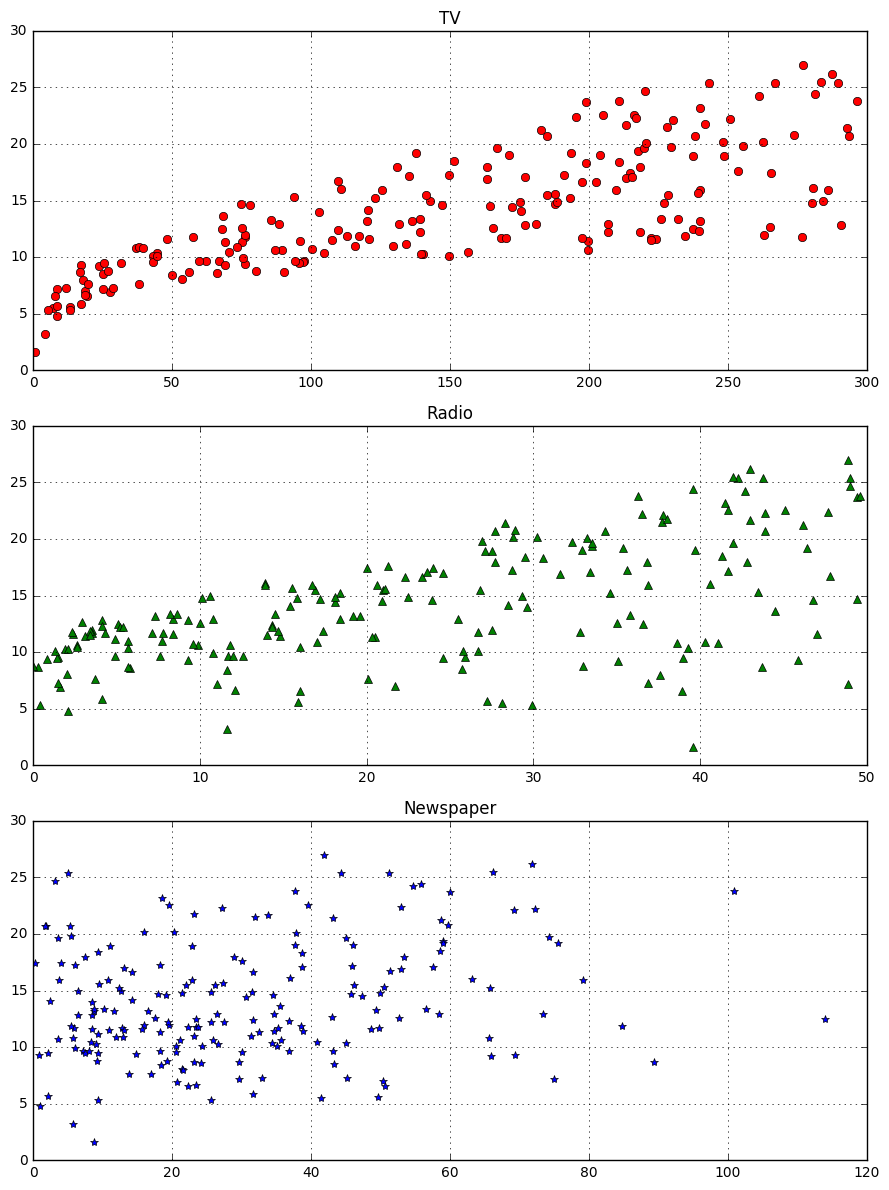

In [19]:
# Plot seperate plots
plt.figure(figsize=(9,12))
plt.subplot(311)
plt.plot(data['TV'], y, 'ro')
plt.title('TV')
plt.grid()
plt.subplot(312)
plt.plot(data['Radio'], y, 'g^')
plt.title('Radio')
plt.grid()
plt.subplot(313)
plt.plot(data['Newspaper'], y, 'b*')
plt.title('Newspaper')
plt.grid()
plt.tight_layout()
plt.show()


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
coefficients: [ 0.04656457  0.17915812  0.00345046]
intercept: 2.87696662232
mse, rmse 1.97304562023 1.40465142303


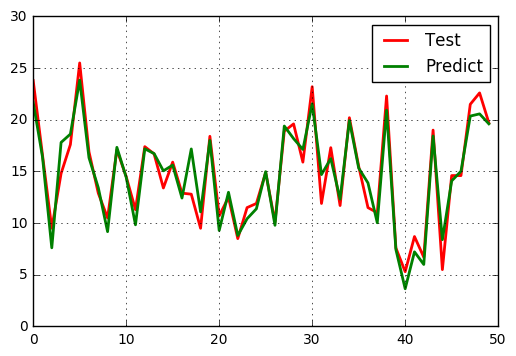

In [25]:

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1)
# print x_train, y_train
linreg = LinearRegression()
model = linreg.fit(x_train, y_train)
print (model)
print ('coefficients:',linreg.coef_)
print ('intercept:',linreg.intercept_)

y_hat = linreg.predict(np.array(x_test))
mse = np.average((y_hat - np.array(y_test)) ** 2)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
print ('mse, rmse',mse, rmse)

t = np.arange(len(x_test))
plt.plot(t, y_test, 'r-', linewidth=2, label='Test')
plt.plot(t, y_hat, 'g-', linewidth=2, label='Predict')
plt.legend(loc='upper right')
plt.grid()
plt.show()

### Penalized Linear Regression with CV


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV  # cross validation 

In [28]:
data = pd.read_csv('8.Advertising.csv')    # TV、Radio、Newspaper、Sales
x = data[['TV', 'Radio', 'Newspaper']]
# x = data[['TV', 'Radio']]
y = data['Sales']
print(x.head())
print(y.head())

      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4
0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64


In [ ]:

    # pandas读入

    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
    # print x_train, y_train
    model = Lasso()
    # model = Ridge()

    alpha_can = np.logspace(-3, 2, 10)
    lasso_model = GridSearchCV(model, param_grid={'alpha': alpha_can}, cv=5)
    lasso_model.fit(x, y)
    print '验证参数：\n', lasso_model.best_params_

    y_hat = lasso_model.predict(np.array(x_test))
    mse = np.average((y_hat - np.array(y_test)) ** 2)  # Mean Squared Error
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    print mse, rmse

    t = np.arange(len(x_test))
    plt.plot(t, y_test, 'r-', linewidth=2, label='Test')
    plt.plot(t, y_hat, 'g-', linewidth=2, label='Predict')
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()
